<AxesSubplot:>

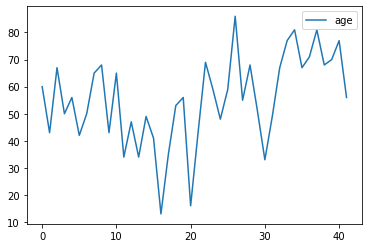

In [1]:
import pandas as pd 
df=pd.read_csv('c:/data/time/kings.dat',header=None, names=['age'])
df.plot()

0     NaN
1    25.0
2   -40.0
3    10.0
4    20.0
dtype: float64
0     NaN
1     NaN
2   -15.0
3   -30.0
4    30.0
dtype: float64
1    25.0
2   -40.0
3    10.0
4    20.0
dtype: float64


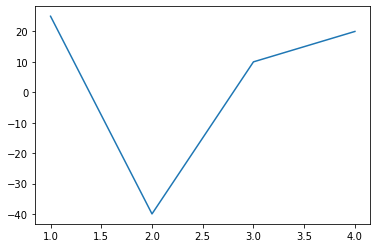

In [2]:
import matplotlib.pyplot as plt 
a=pd.Series([1025,1050,1010,1020,1040])
print(a.diff(periods=1)) #1차 차분
print(a.diff(periods=2)) #2차 차분
# 1차 차분
b=a.diff(periods=1).iloc[1:] 
print(b)
plt.plot(b)

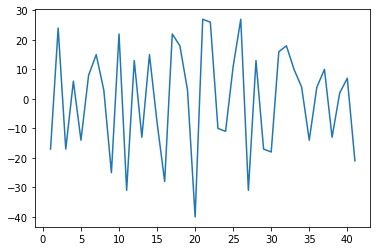

In [3]:
diff1=df['age'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [4]:
np.log(df['age']).diff(periods=1)

NameError: name 'np' is not defined

In [5]:
from statsmodels.tsa.stattools import adfuller 
import numpy as np 
diff1=np.log(df['age']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print(result[1]) #p-value < 0.05 안정적인 시계열 자료 

(-7.446856429613951, 5.807660899733685e-11, 2, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 32.20496009678498)
5.807660899733685e-11


In [6]:
from pmdarima.arima import auto_arima
model=auto_arima(df)
model 
# arima(0,1,1)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
train=df[:30]
test=df[30:]

In [8]:
from statsmodels.tsa.arima.model import ARIMA 
model=ARIMA(train,order=(0,1,1)).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    age   No. Observations:                   30
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -121.381
Date:                Fri, 24 Jun 2022   AIC                            246.762
Time:                        16:34:35   BIC                            249.497
Sample:                             0   HQIC                           247.619
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7373      0.174     -4.230      0.000      -1.079      -0.396
sigma2       246.2205     73.899      3.332      0.001     101.381     391.060
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.80   Prob(JB):                         0.94
Heteroskedasticity (H):               2.55   Skew:                            -0.02
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

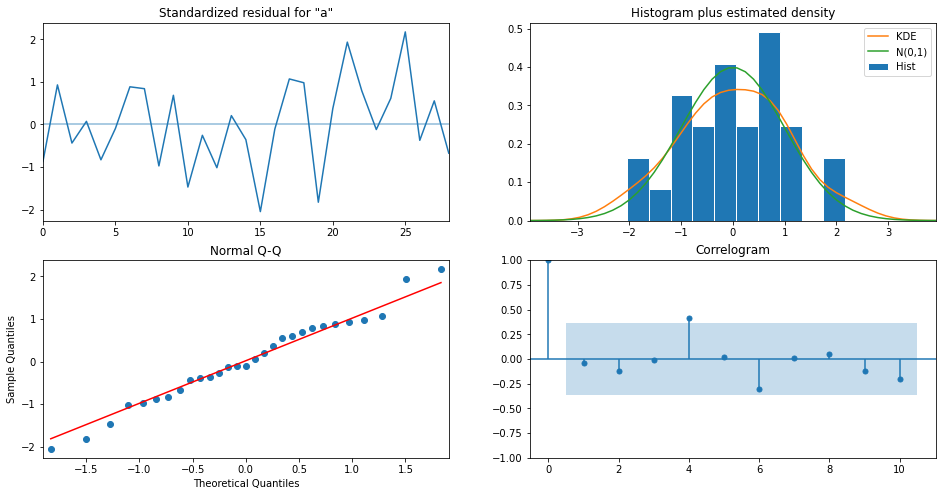

In [11]:
#Jjung-Box : 잔차가 백색잡음인지 검정한 통계량, 0.05보다 작으면 안정적인 시계열 데이터
#Jarque-Bera : 잔차가 정규분포인지, 0.05보다 작으면 정규분포가 아님
model.plot_diagnostics(figsize=(16, 8))
plt.show()
#Standardized residual: 잔차를 시계열로 그린 그래프, 랜덤성이므로 안정적인 시계열 자료
#백색 잡음 : 자기상관성이 없는 시계열(안정적인 시계열 데이터)
#Correlogram : 잔차에 대한 ACF(자기상관성 그래프) 크게 벗어나지 않음
#Histogram plus estimated density와 Normal Q-Q : 잔차가 정규성을 만족하는가
#안정적인 시계열 자료이고 정규분포임

In [ ]:
fore=model.forecast(steps=5)
print(fore)

30    58.820102
31    58.820102
32    58.820102
33    58.820102
34    58.820102
Name: predicted_mean, dtype: float64


In [ ]:
# model.plot_predict()
# plt.show()

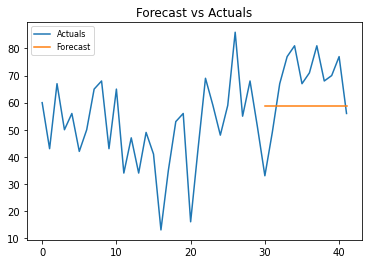

In [ ]:
#fc,se,conf=model.forecast(steps=len(test))
a=model.forecast(steps=len(test))
# fc_series=pd.Series(fc, index=test.index)
# lower=pd.Series(conf[:,0],index=test.index)
# upper=pd.Series(conf[:,1],index=test.index)
plt.plot(df,label='Actuals')
plt.plot(a,label='Forecast')
#plt.fill_between(lower.index, lower, upper, alpha=0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left',fontsize=8)
plt.show()